## tensorflow

In [4]:
from tensorflow import keras
import numpy as np

In [25]:
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

target = np.array([[1], [0], [1], [1], [0], [1]])

In [26]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_index)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [27]:
sequences = tokenizer.texts_to_sequences(samples)
input_sequences = np.array(sequences)

word_index = tokenizer.word_index

print(samples)
print(input_sequences)

['너 오늘 이뻐 보인다', '나는 오늘 기분이 더러워', '끝내주는데, 좋은 일이 있나봐', '나 좋은 일이 생겼어', '아 오늘 진짜 짜증나', '환상적인데, 정말 좋은거 같아']
[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [28]:
batch_size = 2
num_epochs = 100
vocab_size = len(word_index) + 1    # 단어 시작 위치를 위해 + 1
emb_size = 128      # 단어 하나를 어느 사이즈로 할 것인가
hidden_dimention = 256
output_dimension = 1

In [29]:
import tensorflow as tf

In [30]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, emb_size, input_length = 4))
model.add(keras.layers.Lambda(lambda x:tf.reduce_mean(x, axis=1)))
model.add(keras.layers.Dense(hidden_dimention, activation='relu'))
model.add(keras.layers.Dense(output_dimension, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [32]:
model.fit(input_sequences, target, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 0.6898 - acc: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6689 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6505 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6330 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6118 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5889 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5608 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5316 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4932 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4533 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.4111 

In [33]:
from tensorflow import keras 

In [35]:
# Funtional API
inputs = keras.layers.Input(shape=(4,))
embed_output = keras.layers.Embedding(vocab_size, emb_size)(inputs)
pooled_output = tf.reduce_mean(embed_output, axis = 1)
hidden_layer = keras.layers.Dense(hidden_dimention, activation='relu')(pooled_output)
outputs = keras.layers.Dense(output_dimension, activation='sigmoid')(hidden_layer)
model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])
model.fit(input_sequences, target, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.7007 - acc: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6807 - acc: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6646 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6512 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6328 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6136 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5899 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5630 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5342 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4974 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4

In [36]:
# subclass
class CustomModel(keras.Model):
    def __init__(self, vocab_size, embed_dimension, hidden_dimention, output_dimension) -> None:
        super(CustomModel, self).__init__(name='my_model')
        self.embedding = keras.layers.Embedding(vocab_size, embed_dimension)
        self.dense_layer = keras.layers.Dense(hidden_dimention, activation='relu')
        self.output_layer = keras.layers.Dense(output_dimension, activation='sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis=1)
        x = self.dense_layer(x)
        x = self.output_layer(x)

        return x

In [40]:
model = CustomModel(vocab_size=vocab_size,
                    embed_dimension=emb_size,
                    hidden_dimention=hidden_dimention,
                    output_dimension=output_dimension)
model.build(input_shape=(1, 4,))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    multiple                  2688      
                                                                 
 dense_24 (Dense)            multiple                  33024     
                                                                 
 dense_25 (Dense)            multiple                  257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________________


In [41]:

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(input_sequences, target, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.6910 - acc: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6691 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6520 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6325 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6103 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5878 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5608 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5292 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4930 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4522 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4086 

## scikit-learn

In [44]:
import sklearn
sklearn.__version__

'1.2.1'

In [61]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
iris_dataset = load_iris()
print('iris_dataset key: {}'.format(iris_dataset.keys()))

iris_dataset key: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [51]:
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['DESCR'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ==

In [54]:
print(type(iris_dataset['data']))

<class 'numpy.ndarray'>


In [58]:
iris = pd.DataFrame(iris_dataset['data'])
iris.columns = iris_dataset['feature_names']
iris['target'] = iris_dataset['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
setosa = iris[iris['target'] == 0]
versicolor = iris[iris['target'] == 1]
virginica = iris[iris['target'] == 2]

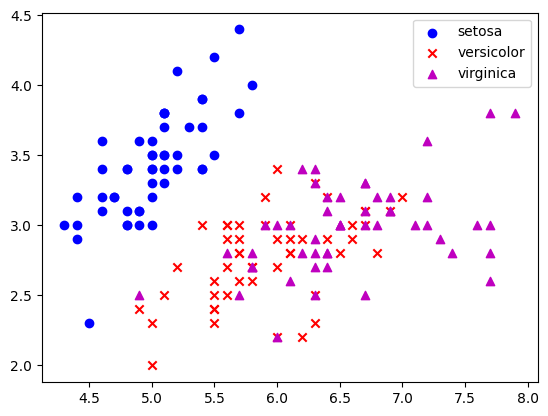

In [62]:
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], marker = 'o',
            color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], marker = 'x',
            color = 'r', label = 'versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], marker = '^',
            color = 'm', label = 'virginica')
plt.legend()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### 데이터 분리

In [66]:
train_input, test_input, train_target, test_target = train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                                      test_size=0.2)

In [67]:
print(train_input.shape, test_input.shape)

(120, 4) (30, 4)


#### 데이터 변환
- z-scalling

In [68]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [72]:
print(train_input[:10])

[[6.4 3.2 4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [4.9 3.6 1.4 0.1]
 [5.9 3.  5.1 1.8]
 [6.9 3.1 5.4 2.1]
 [5.4 3.9 1.7 0.4]
 [6.5 3.2 5.1 2. ]
 [6.1 2.6 5.6 1.4]
 [6.8 2.8 4.8 1.4]
 [5.1 3.5 1.4 0.3]]


### K-Neighbors Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [77]:
new_input = np.array([[6.1, 2.3, 4.5, 6.2]])
new_scaled = ss.transform(new_input)

predict = knn.predict(new_scaled)
print(predict)

knn.predict_proba(new_scaled)

[2]


array([[0., 0., 1.]])

In [79]:
predict_test = knn.predict(test_scaled)
print(predict_test)

np.mean(predict_test == test_target)

[0 1 2 0 2 0 2 2 0 0 1 0 0 0 1 1 1 2 2 0 1 2 0 2 1 1 0 1 2 0]


0.9

- 기하학적 거리
    - Euclidean: d(x, y) = sqrt(sum(xi - yi)^2)
    - Manhattan: d(x, y) = sum( |xi - yi| )
    - minkowski: d(x, y) = (sum( |xi - yi|^q ))^(1/q)
    - Gower: Manhattan(Continuous) + Dice Coefficient(Norminal)

### K-Means Classifier

In [ ]:
from sklearn.cluster import KMeans

In [89]:
kms = KMeans(n_clusters=3)
kms.fit(train_scaled)

c:\Users\YGL\anaconda3\envs\CV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YGL\anaconda3\envs\CV\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [90]:
new_input = np.array([[6.1, 2.3, 4.5, 6.2]])
new_scaled = ss.transform(new_input)

predict = kms.predict(new_scaled)
print(predict)

[0]


In [91]:
predict_test = kms.predict(test_scaled)
print(predict_test)

np.mean(predict_test == test_target)

[1 2 0 1 0 1 0 2 1 1 2 1 1 1 2 0 2 0 0 1 2 0 1 0 0 2 1 2 0 1]


0.03333333333333333